In [91]:
#Import lib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [92]:
#Load Data
import pathlib
data_dir = "C:/Users/tanye/Desktop/Machine Learning/BrainTumorDataSet/BrainTumor/"
data_dir = pathlib.Path(data_dir)

In [93]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2480


In [94]:
cancer = list(data_dir.glob("pos/*"))

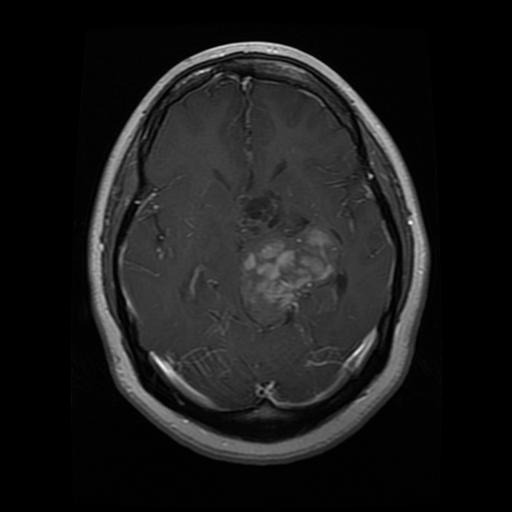

In [95]:
PIL.Image.open((cancer[0]))

In [96]:
healthy = list(data_dir.glob("neg/*"))

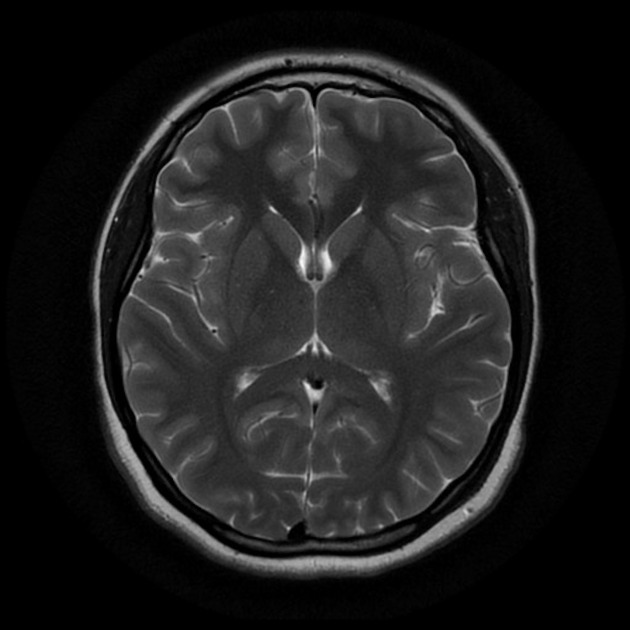

In [97]:
PIL.Image.open((healthy[0]))

In [98]:
#Create a data set
batch_size = 32
img_height = 180
img_width = 180

#Validation Split 80/20 - train/test
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2488 files belonging to 2 classes.
Using 1991 files for training.


In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2488 files belonging to 2 classes.
Using 497 files for validation.


In [100]:
#Class Names (neg = no cancer and pos = cancer)
class_names = train_ds.class_names
print(class_names)

['neg', 'pos']


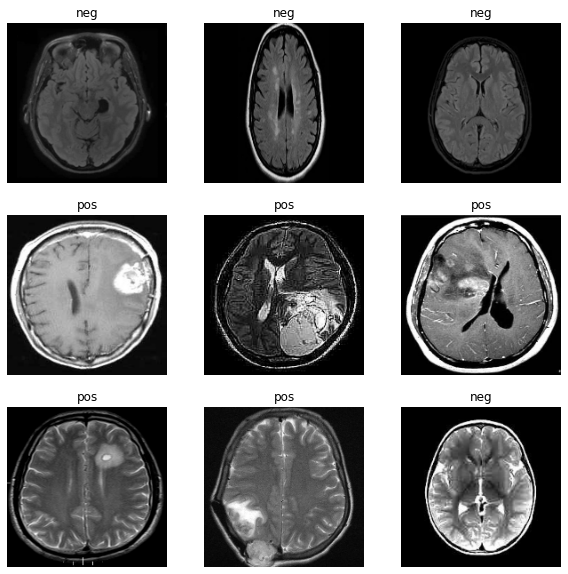

In [15]:
#Visualization of data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
#Run manually through and retrieve image stack
#Picture Format 180x180x3
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
#Configuration data set for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
#Standardization of data
# RGB channel values are in the [0, 255] range - this is not ideal for NN
# Goal is to standarized the vaules to [0, 1] by resizing
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [19]:
#Create Modell
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
#Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [22]:
#Training Modell
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
63/63 [==============================] - 23s 367ms/step - loss: 0.6278 - accuracy: 0.7127 - val_loss: 0.3632 - val_accuracy: 0.8149
Epoch 2/10
63/63 [==============================] - 23s 372ms/step - loss: 0.3350 - accuracy: 0.8564 - val_loss: 0.3036 - val_accuracy: 0.8813
Epoch 3/10
63/63 [==============================] - 24s 380ms/step - loss: 0.2059 - accuracy: 0.9221 - val_loss: 0.2824 - val_accuracy: 0.8712
Epoch 4/10
63/63 [==============================] - 26s 408ms/step - loss: 0.1514 - accuracy: 0.9432 - val_loss: 0.1862 - val_accuracy: 0.9276
Epoch 5/10
63/63 [==============================] - 25s 392ms/step - loss: 0.0894 - accuracy: 0.9684 - val_loss: 0.2228 - val_accuracy: 0.9115
Epoch 6/10
63/63 [==============================] - 24s 383ms/step - loss: 0.0491 - accuracy: 0.9829 - val_loss: 0.2430 - val_accuracy: 0.9235
Epoch 7/10
63/63 [==============================] - 24s 381ms/step - loss: 0.0385 - accuracy: 0.9890 - val_loss: 0.2162 - val_accuracy: 0.9054

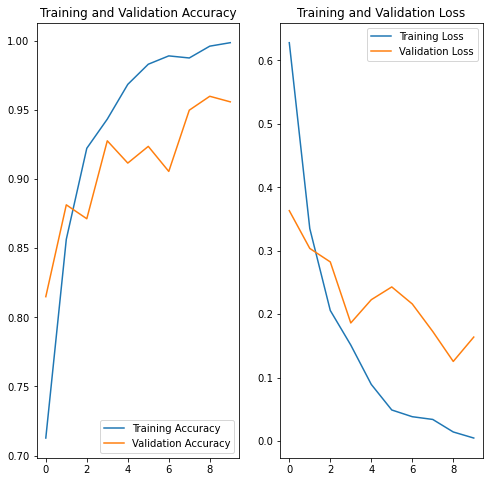

In [25]:
#Visualize Result of Training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Data Augmentation
#Does not work, because of numpy version
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

#Visualization (only first 9 imgs)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [45]:
tf.__version__, np.__version__

('2.3.0', '1.20.2')

In [54]:
#Drop-out for minimizing overfitting
model = Sequential([
  #data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [55]:
#Compiling and Training 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)      

In [60]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
63/63 [==============================] - 22s 350ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1306 - val_accuracy: 0.9638
Epoch 2/15
63/63 [==============================] - 24s 381ms/step - loss: 0.0161 - accuracy: 0.9935 - val_loss: 0.2045 - val_accuracy: 0.9477
Epoch 3/15
63/63 [==============================] - 25s 395ms/step - loss: 0.0309 - accuracy: 0.9890 - val_loss: 0.1219 - val_accuracy: 0.9577
Epoch 4/15
63/63 [==============================] - 26s 413ms/step - loss: 0.0101 - accuracy: 0.9955 - val_loss: 0.1185 - val_accuracy: 0.9618
Epoch 5/15
63/63 [==============================] - 27s 423ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.1424 - val_accuracy: 0.9658
Epoch 6/15
63/63 [==============================] - 26s 420ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1693 - val_accuracy: 0.9598
Epoch 7/15
63/63 [==============================] - 26s 410ms/step - loss: 6.3931e-04 - accuracy: 1.0000 - val_loss: 0.1522 - val_accuracy: 0.

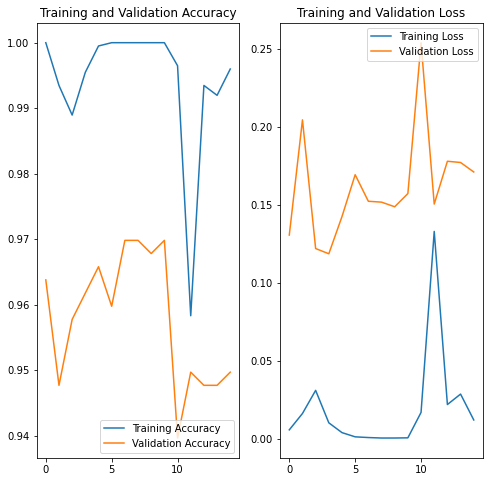

In [75]:
#Visualization after data augmentation and dropout
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
#Cancer Prediction with a newly uploaded mrt image
mrt_url = "https://www.pharmazeutische-zeitung.de/fileadmin/_processed_/c/d/csm_tit-gliom2_20090919_113987_01_4541bc7f0d.jpg"
mrt_path = tf.keras.utils.get_file('MRT Cancer', origin=mrt_url)

img = keras.preprocessing.image.load_img(
    mrt_path, target_size=(img_height, img_width)
)

img.show()

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



This image most likely belongs to pos with a 99.99 percent confidence.
